# Basic SKLearn Decision Trees

#### Template from Edx: Python for Data Science, UCSD, 2018

### In this notebook, I will go through the processes of decision trees in analysis using SKLearn.

## But first, a photo of a photosynthetic golden jellyfish for inspiration

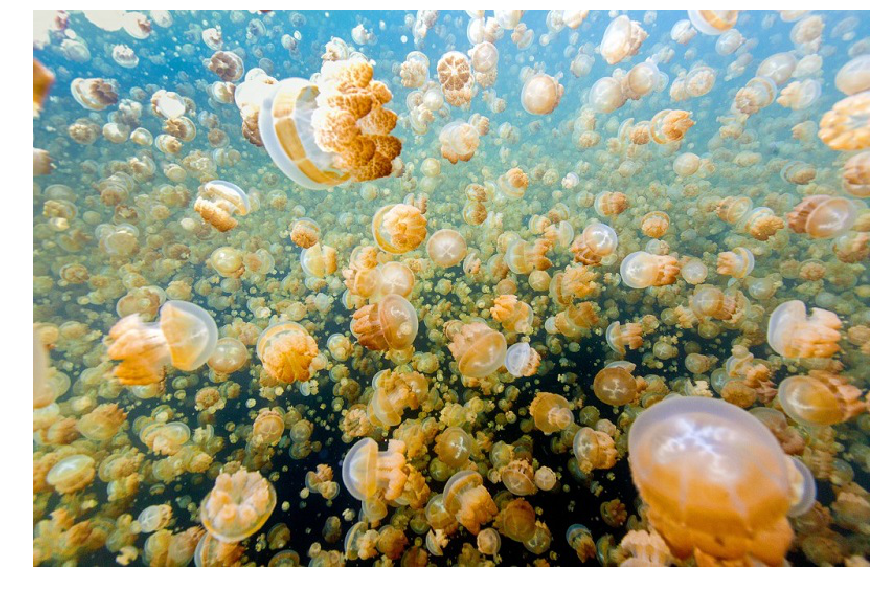

In [99]:
%matplotlib inline
import numpy as np
#from scipy import misc
import imageio
import matplotlib.pyplot as plt
from skimage import data

photo_golden_jelly = imageio.imread('/Users/meganporter/OwnJupyterNotebooks/GoldenJelly.jpg')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(photo_golden_jelly)

#photo credit http://www.ebaumsworld.com/pictures/jellyfish-lake/83970879/

# DECISION TREES

In [77]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Connecting to weather-related data, courtesy of UCSD

In [78]:
weather_data = pd.read_csv('./weather/daily_weather.csv')

In [79]:
# Look at the column labels to get an idea of available data
weather_data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [80]:
# Let's look at the data itself
weather_data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.00,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


In [81]:
weather_data.shape

(1095, 11)

In [82]:
# Check for null values
weather_data[weather_data.isnull().any(axis = 1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [83]:
row_num_before = weather_data.shape[0]
row_num_before

1095

In [84]:
# Drop the null values
weather_data.dropna()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.00,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


In [85]:
# Rename weather_data so that variable reflects drop of null values
weather_data = weather_data.dropna()

In [86]:
after_num_rows = weather_data.shape[0]
after_num_rows

1064

In [87]:
row_num_before - after_num_rows


31

## Decision Tree Process Begins

#### We will look at humidity data and use all other data to try and predict relative humidity.  The first step is to convert the relative humidity data to binary form.

In [88]:
clean_weather_data = weather_data.copy()

#Multiplying the boolean value that results from a > comparison converts data in the new column to 
#integer values 1 and 0. In this case, we are converting 'relative_humidity_3pm' to binary form

clean_weather_data['high_humidity_label'] = (clean_weather_data['relative_humidity_3pm'] > 24.99)*1
print(clean_weather_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
5       1
6       0
7       1
8       0
9       1
10      1
11      1
12      1
13      1
14      0
15      0
17      0
18      1
19      0
20      0
21      1
22      0
23      1
24      0
25      1
26      1
27      1
28      1
29      1
30      1
       ..
1064    1
1065    1
1067    1
1068    1
1069    1
1070    1
1071    1
1072    0
1073    1
1074    1
1075    0
1076    0
1077    1
1078    0
1079    1
1080    0
1081    0
1082    1
1083    1
1084    1
1085    1
1086    1
1087    1
1088    1
1089    1
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


In [89]:
# Compare the binary form of 'relative_humidity_3pm' to its original form
clean_weather_data['relative_humidity_3pm']

0       36.160000
1       19.426597
2       14.460000
3       12.742547
4       76.740000
5       33.930000
6       21.385657
7       74.920000
8       24.030000
9       68.050000
10      32.130000
11      79.090000
12      58.430000
13      27.990000
14      24.370000
15      14.801706
17      20.755683
18      45.870000
19       7.740000
20      14.649909
21      41.340000
22      17.281161
23      66.000000
24      16.331716
25      47.030000
26      90.990000
27      43.900000
28      84.390000
29      90.580000
30      35.690000
          ...    
1064    33.190000
1065    39.370000
1067    52.070000
1068    62.620000
1069    56.930000
1070    62.490000
1071    41.850000
1072    19.810000
1073    27.450000
1074    53.380000
1075    15.511157
1076    23.720000
1077    38.120000
1078     9.373013
1079    65.590000
1080    20.400000
1081    12.696233
1082    53.860000
1083    62.400000
1084    34.690000
1085    88.160000
1086    81.890000
1087    47.340000
1088    55.490000
1089    69

## It's time to store the target output in a variable

In [90]:
y = clean_weather_data[['high_humidity_label']].copy()

### Compare initial target to initial original data

In [91]:
clean_weather_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [92]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [93]:
y.columns

Index(['high_humidity_label'], dtype='object')

## It's time to start the process of collecting input data

### First, group input variables and assign them to a new descriptive variable

In [94]:
morning_characteristics = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

### Make a copy and assign morning features to an input variable

In [95]:
X = clean_weather_data[morning_characteristics].copy()
# #Using .copy(deep=true) copies complex data like lists into the new data frame

In [96]:
# Check to columns of input data
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [97]:
# Check the 'columns' of output data
y.columns

Index(['high_humidity_label'], dtype='object')

## Begin the training phase by performing 'Test Train Split'

In [100]:
# With this assigning we are telling SKLearn what are the input variables, what are the output variables, 
# and what percentage of the data to save for testing
# Random_state=324 is a numerical standard for how random the test_size is chosen?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

### Check to make sure that all variables are in the correct data format

In [101]:
type(X_train)

pandas.core.frame.DataFrame

In [102]:
type(X_test)

pandas.core.frame.DataFrame

In [103]:
type(y_train)

pandas.core.frame.DataFrame

In [104]:
type(y_test)

pandas.core.frame.DataFrame

In [105]:
X_train.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
841,918.370000,72.932000,184.500000,2.013246,186.700000,2.773806,0.0,0.0
75,920.100000,53.492000,186.100000,13.444009,193.800000,15.367778,0.0,0.0
95,927.610000,54.896000,55.000000,4.988376,53.400000,7.202947,0.0,0.0
895,919.235153,65.951112,194.343333,2.942019,216.569792,3.658810,0.0,0.0
699,919.888128,68.687822,228.517730,3.960858,247.954028,5.185547,0.0,0.0


In [109]:
y_train.describe()

,high_humidity_label
count,712.000000
mean,0.494382
std,0.500320
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Assign training variables to the Decision Tree function in SKLearn

In [107]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [108]:
type(humidity_classifier)

sklearn.tree.tree.DecisionTreeClassifier

## Now it's time to make predictions

In [110]:
new_predictions = humidity_classifier.predict(X_test)

In [111]:
new_predictions[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [112]:
y_test.head()

,high_humidity_label
456,0
845,0
693,1
259,1
723,1


In [114]:
# Test accuracy of prediction
accuracy_score(y_true = y_test, y_pred = new_predictions)

0.8153409090909091